In [7]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Definindo o estilo dos plots
sns.set_style("whitegrid")
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

path_raul = '/dados/home/alessandrorivello/Kaggle/Dados/'


# Definir os datatypes antes da importação otimiza o uso de memória pelo Pandas.
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint8',
        'device'        : 'uint8',
        'os'            : 'uint8',
        'channel'       : 'uint8',
        'is_attributed' : 'uint8',
        'days'          : 'uint8',
        'hours'         : 'uint8',
        'minutes'       : 'uint8',
        'seconds'       : 'uint8',
        }

# Forçando o Pandas a ler as mesmas colunas, sem necessidade de ler click_time, click_id e days, uma vez que os dados
# de teste e treinamento são de dias diferentes. Logo essa feature não é informativa.

cols_train = ['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'hours', 'minutes']
cols_test = ['ip', 'app', 'device', 'os', 'channel', 'hours', 'minutes']

train = pd.read_csv(path_raul + '10_train_timed.csv', dtype = dtypes, usecols = cols_train)
test = pd.read_csv(path_raul + 'test_timed.csv', dtype = dtypes, usecols = cols_test)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


In [ ]:
def blacklist(features, nick_names, dataframe, numb_class=4):
    # Esta função adiciona duas novas colunas no dataframe dado, feature_count e feature_conv.
    # feature_count = em qual quartil(ou outra separação especificada por numb_class) 
    # está aquela observação, em relação ao número de cliques, 
    # na distribuição do total de cliques dessa feature;
    # feature_conv = o mesmo que a feature_count, mas em relação a taxa de conversão
    
    categories=range(1,numb_class+1)
    df=dataframe.copy()
        
    for feature, nick_name in zip(features, nick_names):
        
        conversion = dataframe[[feature, 'is_attributed']].groupby(feature, as_index=False).mean().sort_values(
                                                                                                'is_attributed', 
                                                                                                 ascending=True)
        counts = dataframe[[feature, 'is_attributed']].groupby(feature, as_index=False).count().sort_values(
                                                                                                'is_attributed', 
                                                                                                 ascending=True)

        # Fazendo um filtro na taxa de conversão mínima considerada devido a problemas técnicos com o qcut
        conversion = conversion[conversion.is_attributed > 0.001]
        conversion[nick_name+'_conv']=pd.qcut(conversion['is_attributed'], numb_class, labels=False, duplicates='drop')
        conversion[nick_name+'_conv']=conversion[nick_name+'_conv']+1 # Apenas padronizando a categoria criada
        counts[nick_name+'_count']=pd.qcut(counts['is_attributed'], numb_class, categories)

        # Dropando a coluna is_attributed para não ter problemas no merge
        conversion=conversion.drop('is_attributed', axis=1)
        counts = counts.drop('is_attributed', axis=1)
        
        counts[nick_name+'_count'] = counts[nick_name+'_count'].astype('uint8')

        df=df.merge(conversion, on=feature, how='left')
        df[nick_name+'_conv']=df[nick_name+'_conv'].fillna(value=1) # Criou-se NA ao se fixar um mínimo na tx de conversão
        df[nick_name+'_conv']=df[nick_name+'_conv'].astype('uint8')

        df=df.merge(counts, on=feature, how='left')
    
    return df

In [ ]:
train_eng = blacklist(['ip', 'app', 'channel'], ['ip', 'app', 'ch'], train)

train_eng.head()

gc.collect();

In [49]:
train_eng.dtypes

ip               uint32
app               uint8
device            uint8
os                uint8
channel           uint8
hours             uint8
minutes           uint8
is_attributed     uint8
ip_conv           uint8
ip_count          uint8
app_conv          uint8
app_count         uint8
ch_conv           uint8
ch_count          uint8
dtype: object

In [50]:
train_eng.head()

,ip,app,device,os,channel,hours,minutes,is_attributed,ip_conv,ip_count,app_conv,app_count,ch_conv,ch_count
0,29045,64,1,13,203,14,54,0,1,4,1,4,1,4
1,64886,3,1,13,123,15,5,0,1,4,1,4,1,4
2,147605,3,1,19,123,15,8,0,1,4,1,4,1,4
3,108881,3,1,19,123,15,25,0,1,4,1,4,1,4
4,116013,3,1,13,123,15,39,0,1,4,1,4,1,4


In [54]:
# Tranformando as features criadas em blacklists para que possa ser usado nos dados de teste

columns = ['ip', 'app', 'ch']

for col in columns:
    train_eng[col+'_count'] = train_eng[col+'_count'].apply(lambda x: 1 if x>=3 else 0)
    train_eng[col+'_conv'] = train_eng[col+'_conv'].apply(lambda x: 1 if x>=3 else 0)

Fazendo a mesma engenharia de features nos dados de teste

In [65]:
test_eng = test.copy()
columns = {'ip':'ip', 'app':'app', 'channel': 'ch'}

for key, value in columns.items():
    
    df = train_eng[train_eng[value+'_conv']==1]
    df = df[[key, value+'_conv']].groupby(key, as_index=False).mean()

    test_eng = test_eng.merge(df, on=key, how='left')
    test_eng[value+'_conv'] = test_eng[value+'_conv'].fillna(value=0)
    
    df = train_eng[train_eng[value+'_count']==1]
    df = df[[key, value+'_count']].groupby(key, as_index=False).mean()

    test_eng = test_eng.merge(df, on=key, how='left')
    test_eng[value+'_count'] = test_eng[value+'_count'].fillna(value=0)
    

In [69]:
test_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18790469 entries, 0 to 18790468
Data columns (total 13 columns):
ip           uint32
app          uint8
device       uint8
os           uint8
channel      uint8
hours        uint8
minutes      uint8
ip_conv      float64
ip_count     float64
app_conv     float64
app_count    float64
ch_conv      float64
ch_count     float64
dtypes: float64(6), uint32(1), uint8(6)
memory usage: 1.2 GB


Note que ficamos com muitos dados do tipo float que pesam na memória e só precisamos de uint8. Vamos ajustar

In [71]:
train_eng[['ip_conv', 'ip_count', 
           'app_conv', 'app_count', 
           'ch_conv', 'ch_count']] = train_eng[['ip_conv', 
                                                'ip_count', 
                                                'app_conv', 
                                                'app_count', 
                                                'ch_conv', 
                                                'ch_count']].astype('uint8')

In [72]:
train_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18490388 entries, 0 to 18490387
Data columns (total 14 columns):
ip               uint32
app              uint8
device           uint8
os               uint8
channel          uint8
hours            uint8
minutes          uint8
is_attributed    uint8
ip_conv          uint8
ip_count         uint8
app_conv         uint8
app_count        uint8
ch_conv          uint8
ch_count         uint8
dtypes: uint32(1), uint8(13)
memory usage: 1.1 GB


# Machine Learning

Com essas novas features criadas, vamos tentar usar random forest para predição

In [21]:
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

# Primeiro separamos os dados de treino em treino e cross-validation

X = train_eng[['ip_conv', 'ip_count', 'app_conv', 'app_count', 'ch_conv', 'ch_count', 'os', 'hours', 'minutes']]
Y = train_eng['is_attributed']
X_train, X_cv, Y_train, Y_cv = model_selection.train_test_split(X,Y, test_size = 0.3)


In [23]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=200, 
                                criterion='gini', 
                                max_depth=400, 
                                min_samples_split=150, #2,
                                min_samples_leaf=100, 
                                min_weight_fraction_leaf=0.0, 
                                max_features=3, 
                                max_leaf_nodes=None, 
                                bootstrap=True, 
                                oob_score=True, 
                                n_jobs=-1, 
                                random_state=None, 
                                verbose=0, 
                                warm_start=False, 
                                class_weight=None)

clf_rf = clf_rf.fit(X_train, Y_train)

CPU times: user 13h 4min 29s, sys: 17min 10s, total: 13h 21min 40s
Wall time: 49min 3s


In [26]:
def clf_eval(clf, X, y_true, classes=['Não baixou', 'Baixou']):
    y_pred = clf.predict(X)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    return roc_auc_score(y_true, y_pred)

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

roc_rf = clf_eval(clf_rf, X_cv, Y_cv)

Classification Report
             precision    recall  f1-score   support

 Não baixou       1.00      1.00      1.00   5533514
     Baixou       0.87      0.61      0.72     13603

avg / total       1.00      1.00      1.00   5547117

ROC Score: 0.8024363913927127
Accuracy Score: 0.9988177642548373
Average Precision Score: 0.5298493939522556
f1 Score: 0.7151172893136403


Vamos definir algumas funções que nos ajudam a visualizar como está se comportando nossa random forrest para que possamos mexer nos hyperparâmetros

In [92]:
from sklearn.tree import _tree

def leaf_depths(tree, node_id = 0):
    
     '''
     tree.children_left and tree.children_right store ids
     of left and right chidren of a given node
     '''
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     '''
     If a given node is terminal, 
     both left and right children are set to _tree.TREE_LEAF
     '''
     if left_child == _tree.TREE_LEAF:
         
         '''
         Set depth of terminal nodes to 0
         '''
         depths = np.array([0])

     else:
         
         '''
         Get depths of left and right children and
         increment them by 1
         '''
         left_depths = leaf_depths(tree, left_child) + 1
         right_depths = leaf_depths(tree, right_child) + 1
 
         depths = np.append(left_depths, right_depths)
 
     return depths

def leaf_samples(tree, node_id = 0):
    
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:
        
         samples = np.array([tree.n_node_samples[node_id]])

     else:
        
         left_samples = leaf_samples(tree, left_child)
         right_samples = leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

def draw_ensemble(ensemble, max_leaf):

     plt.figure(figsize=(15,8))
     plt.subplot(211)

     depths_all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         tree = x.tree_
         depths = leaf_depths(tree)
         depths_all = np.append(depths_all, depths)
         plt.hist(depths, histtype='step', color='#ddaaff', 
                  bins=range(min(depths), max(depths)+1))

     plt.hist(depths_all, histtype='step', color='#9933ff', 
              bins=range(min(depths_all), max(depths_all)+1), 
              weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Depth of leaf nodes")
    
     samples_all = np.array([], dtype=int)
    
     plt.subplot(212)
    
     for x in ensemble.estimators_:
         tree = x.tree_
         samples = leaf_samples(tree)
         samples = np.select([samples < max_leaf], [samples])
        
         samples_all = np.append(samples_all, samples)
         
         plt.hist(samples, histtype='step', color='#aaddff', 
                  bins=range(min(samples), max(samples)+1))
    
     plt.hist(samples_all, histtype='step', color='#3399ff', 
              bins=range(min(samples_all), max(samples_all)+1), 
              weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Number of samples in leaf nodes")
    
     plt.show()

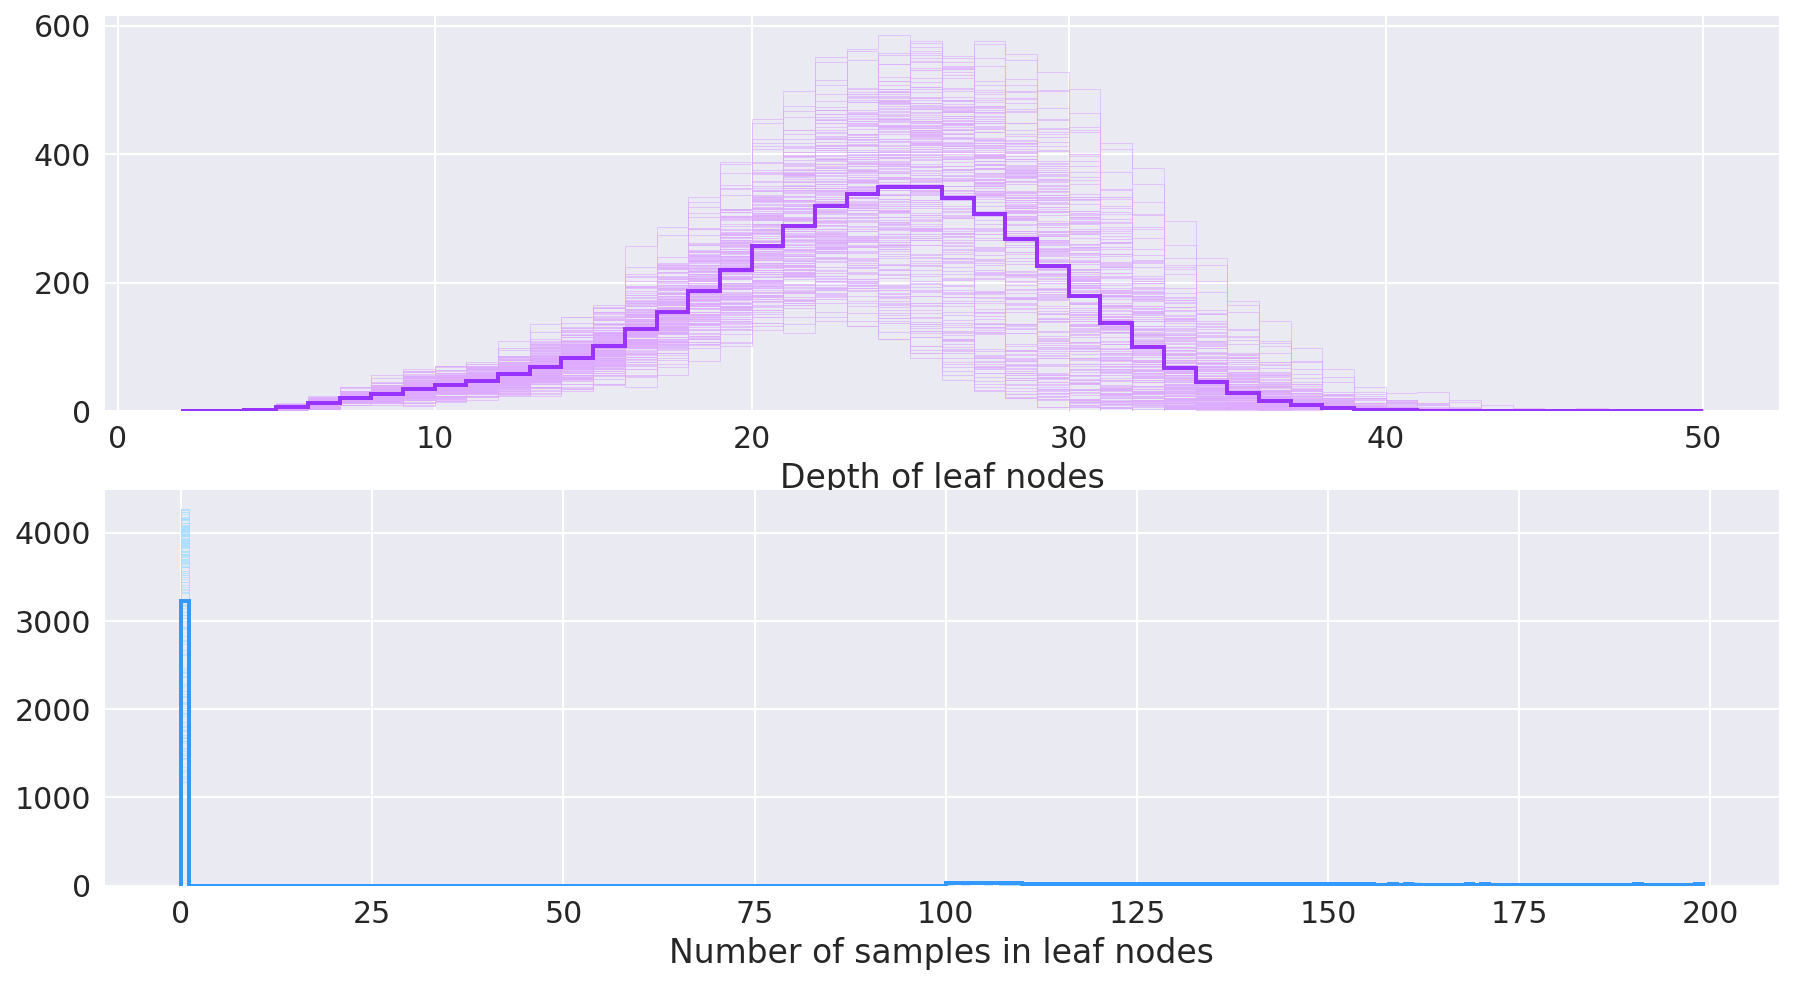

In [93]:
draw_ensemble(clf_rf, 200)